In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, read_files,\
    top_mean_dev_auc, top_mean_validation_auc, rolling_min_dev_auc, top_min_whole_validation_auc,\
    top_min_dev_auc, top_min_validation_auc, read_files

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
files = ['./experiments/narrow.pkl']

In [ ]:
CONT_PARAMETERS.remove('param_scale_pos_weight')
CONT_PARAMETERS.remove('param_bagging_fraction')
INT_PARAMETERS.remove('param_bagging_freq')
SET_PARAMETERS.remove('param_is_unbalance')
SET_PARAMETERS.remove('param_boost_from_average')

In [6]:
top_k = 100000
min_iterations = 100

In [7]:
best_mean_dev = top_mean_dev_auc(read_files(files), top_k)\
    .pipe(lambda x: x[x.groupby(['file', 'experiment_id']).iteration.transform('size') > min_iterations])
best_mean_dev.groupby(['file', 'experiment_id']).ngroups

297

In [8]:
best_min_dev = top_min_dev_auc(read_files(files), top_k)\
    .pipe(lambda x: x[x.groupby(['file', 'experiment_id']).iteration.transform('size') > min_iterations])
best_min_dev.groupby(['file', 'experiment_id']).ngroups

297

In [9]:
true_best = top_min_whole_validation_auc(read_files(files), top_k)\
    .pipe(lambda x: x[x.groupby(['file', 'experiment_id']).iteration.transform('size') > min_iterations])
true_best.groupby(['file', 'experiment_id']).ngroups

324

In [10]:
compare_columns = ['mean_dev_auc', 'mean_validation_auc',
               'mean_whole_validation_auc', 'min_dev_auc', 'min_validation_auc', 'min_whole_validation_auc']

In [11]:
best_mean_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               96912.0  0.833029  0.000796  0.831266  0.832433   
mean_validation_auc        96912.0  0.808517  0.001484  0.800397  0.807722   
mean_whole_validation_auc  96912.0  0.808275  0.001870  0.799171  0.807341   
min_dev_auc                96912.0  0.822569  0.001707  0.813911  0.821702   
min_validation_auc         96912.0  0.805919  0.001734  0.796103  0.804866   
min_whole_validation_auc   96912.0  0.807761  0.001984  0.798524  0.806736   

                                50%       75%       max  
mean_dev_auc               0.833186  0.833658  0.834753  
mean_validation_auc        0.808819  0.809592  0.811730  
mean_whole_validation_auc  0.808567  0.809624  0.812188  
min_dev_auc                0.822995  0.823777  0.826028  
min_validation_auc         0.806195  0.807205  0.810124  
min_whole_validation_auc   0.808105  0.809166  0.812045

In [12]:
best_mean_dev.min_whole_validation_auc.corr(best_mean_dev.mean_dev_auc, method='spearman')

0.3836070808444783

In [13]:
best_min_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               97329.0  0.832818  0.001143  0.828223  0.832225   
mean_validation_auc        97329.0  0.808053  0.002190  0.797441  0.807105   
mean_whole_validation_auc  97329.0  0.807660  0.002708  0.796200  0.806426   
min_dev_auc                97329.0  0.822892  0.001167  0.820507  0.821995   
min_validation_auc         97329.0  0.805453  0.002436  0.794546  0.804192   
min_whole_validation_auc   97329.0  0.807110  0.002863  0.794461  0.805788   

                                50%       75%       max  
mean_dev_auc               0.833168  0.833655  0.834753  
mean_validation_auc        0.808708  0.809597  0.811730  
mean_whole_validation_auc  0.808314  0.809605  0.812584  
min_dev_auc                0.823021  0.823783  0.826028  
min_validation_auc         0.806015  0.807219  0.810141  
min_whole_validation_auc   0.807843  0.809139  0.812045

In [14]:
best_min_dev.min_whole_validation_auc.corr(best_min_dev.min_dev_auc, method='spearman')

0.12417969644963196

In [15]:
true_best[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               94086.0  0.825574  0.011129  0.793337  0.825230   
mean_validation_auc        94086.0  0.803720  0.010679  0.769421  0.806031   
mean_whole_validation_auc  94086.0  0.809721  0.000766  0.808224  0.809110   
min_dev_auc                94086.0  0.814003  0.012480  0.775976  0.814062   
min_validation_auc         94086.0  0.801246  0.011016  0.764249  0.803533   
min_whole_validation_auc   94086.0  0.809290  0.000777  0.808178  0.808648   

                                50%       75%       max  
mean_dev_auc               0.830698  0.833392  0.834753  
mean_validation_auc        0.808811  0.809718  0.811855  
mean_whole_validation_auc  0.809647  0.810254  0.812642  
min_dev_auc                0.819281  0.822825  0.826028  
min_validation_auc         0.806399  0.807503  0.811194  
min_whole_validation_auc   0.809149  0.809808  0.812489

In [16]:
best_mean_dev.merge(true_best, on=['file', 'experiment_id', 'iteration'])\
    .groupby(['file', 'experiment_id']).ngroups

169

In [17]:
best_mean_dev.merge(true_best, on=['file', 'experiment_id', 'iteration']).shape

(44107, 227)

In [18]:
best_min_dev.merge(true_best, on=['file', 'experiment_id', 'iteration'])\
    .groupby(['file', 'experiment_id']).ngroups

162

In [19]:
best_min_dev.merge(true_best, on=['file', 'experiment_id', 'iteration']).shape

(40403, 227)

In [20]:
best = best_min_dev

In [21]:
best.shape

(97329, 115)

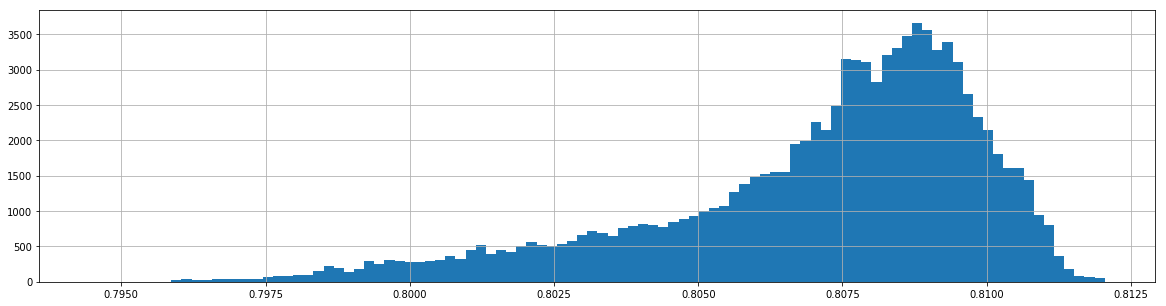

In [25]:
best.min_whole_validation_auc.hist(bins=100);

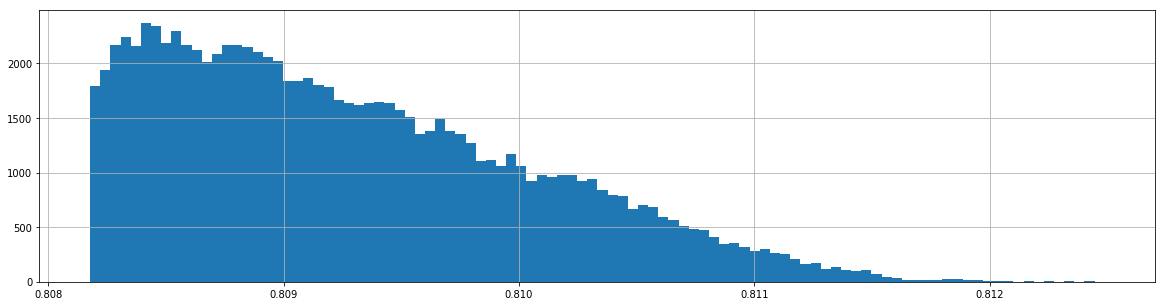

In [26]:
true_best.min_whole_validation_auc.hist(bins=100);

In [27]:
best_iteration = best.sort_values('mean_dev_auc').groupby(['file', 'experiment_id']).last()

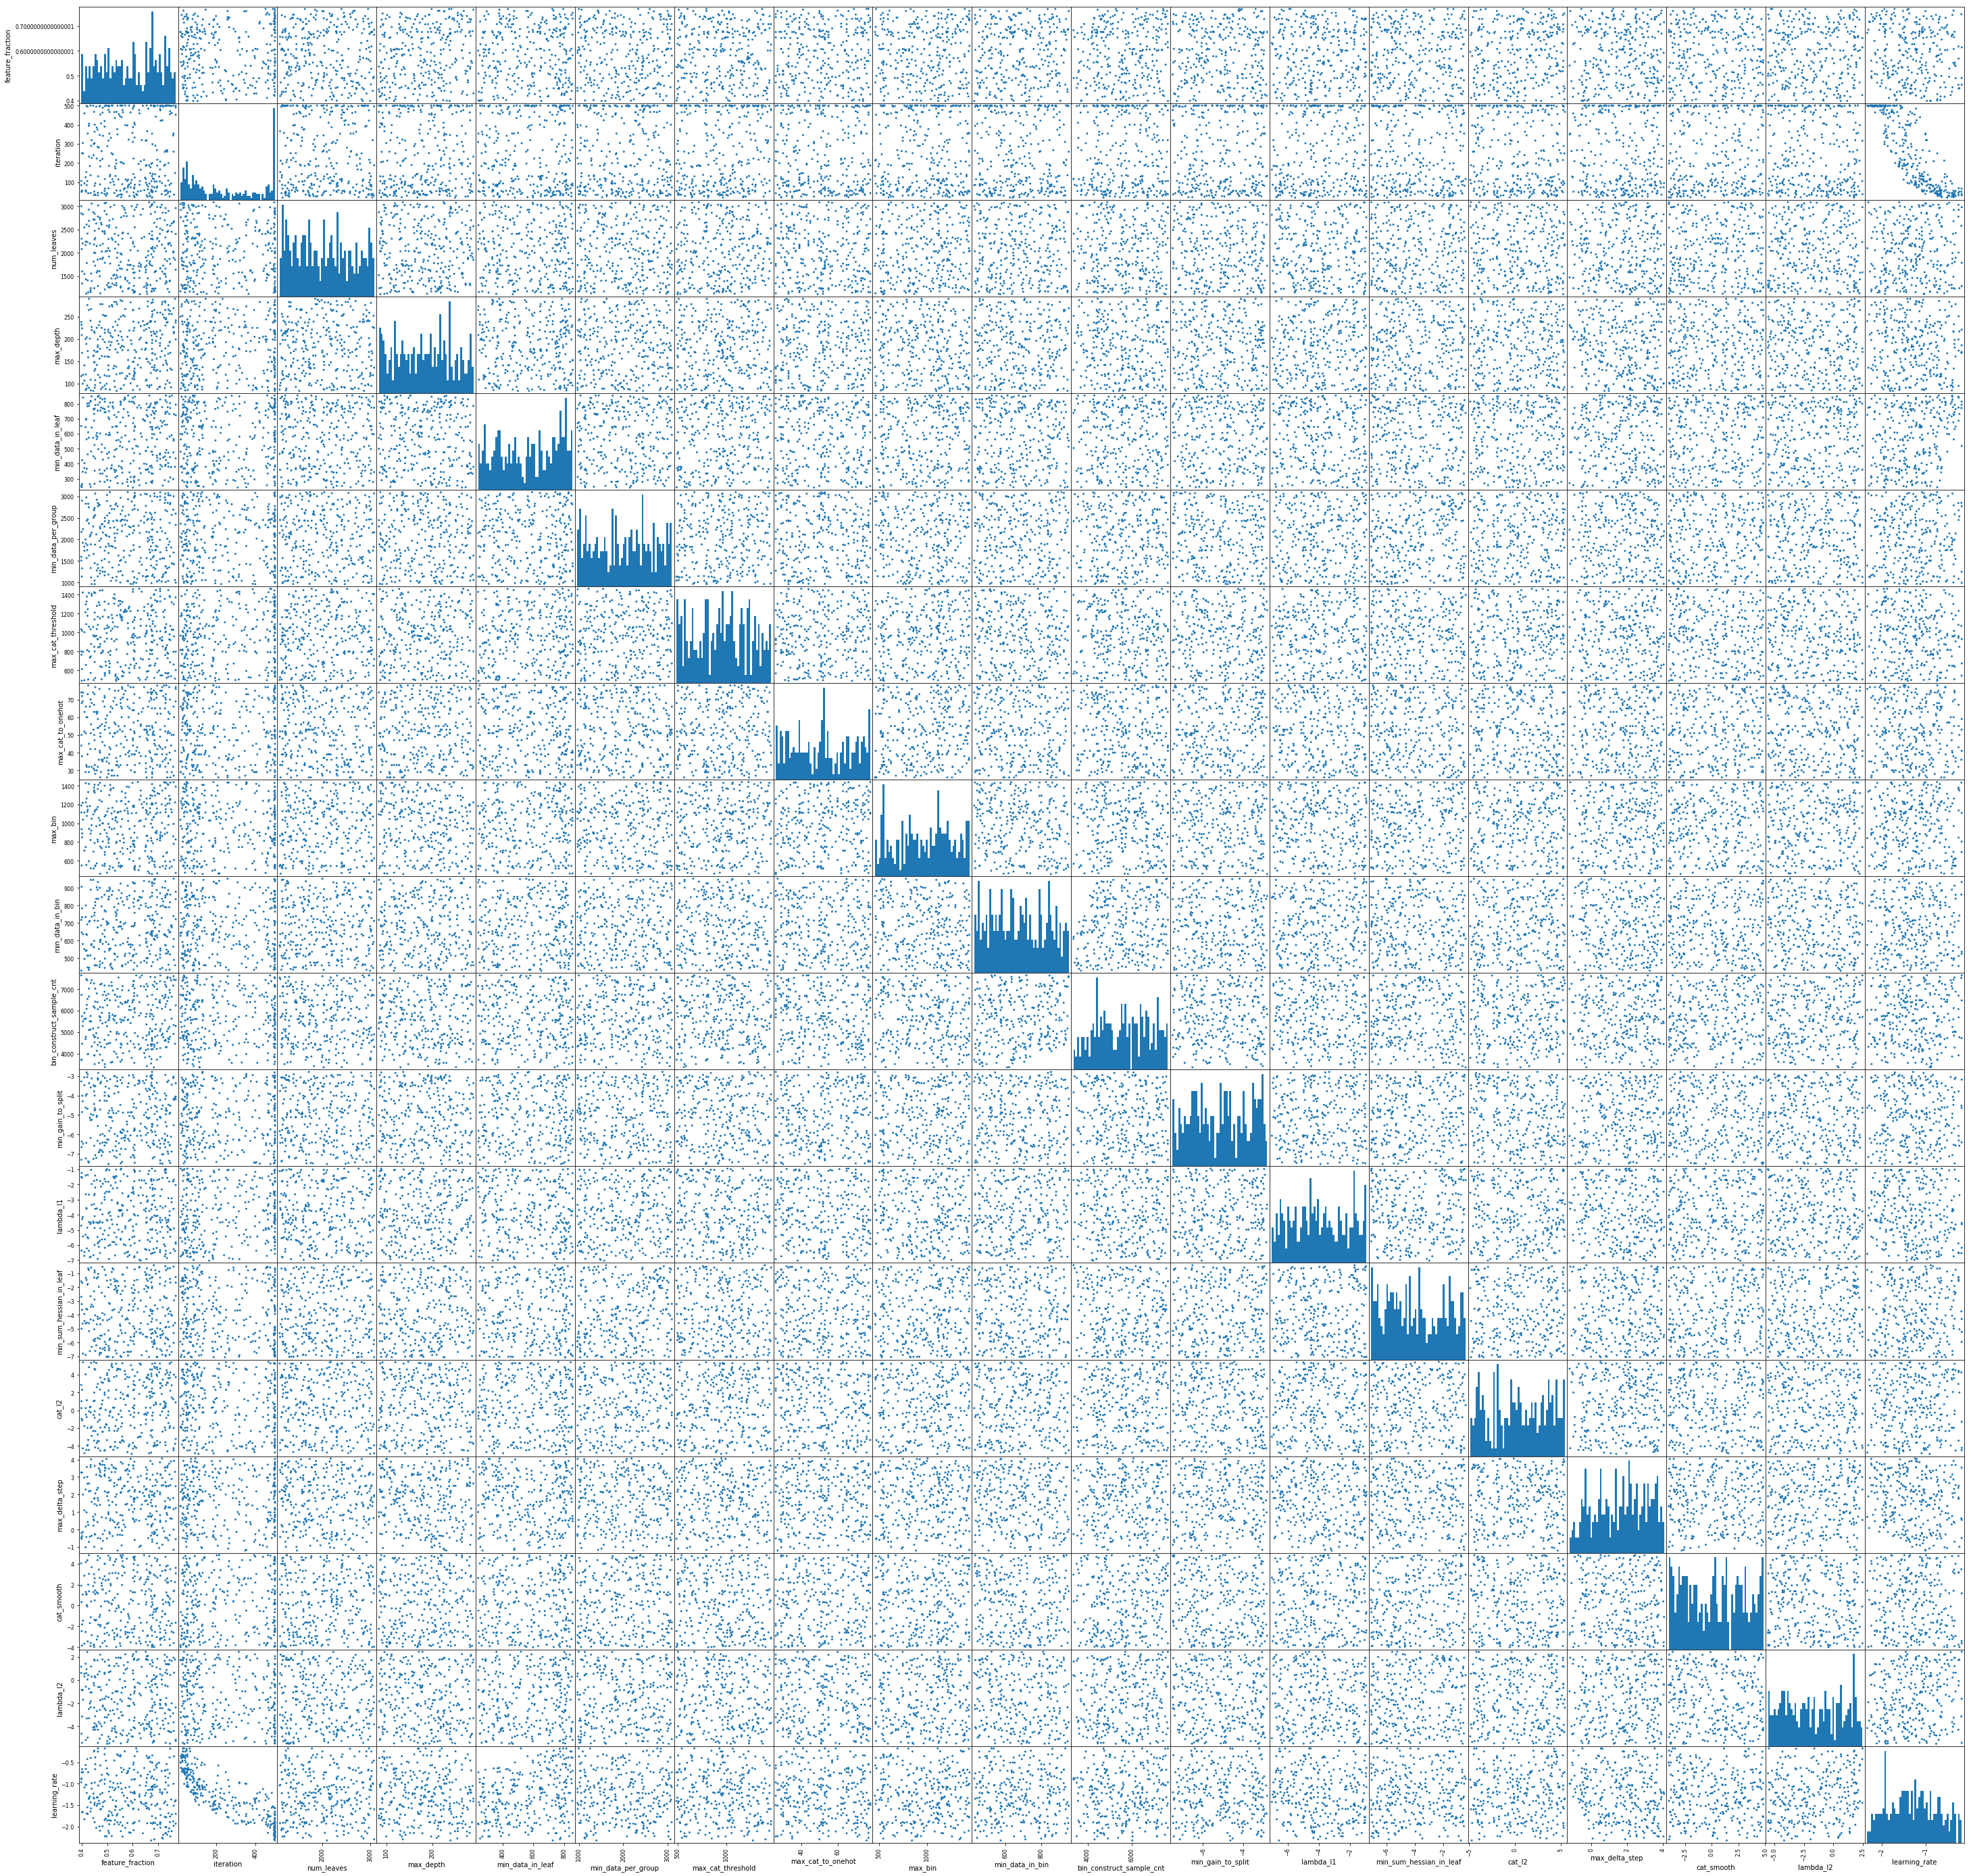

In [28]:
pd.plotting.scatter_matrix(
    pd.concat([best_iteration[CONT_PARAMETERS + INT_PARAMETERS], 
               np.log10(best_iteration[list(set(LOG_PARAMETERS))])],
              axis='columns',
              sort=True
             ).rename(lambda x: x.replace('param_', ''), axis='columns'),
    alpha=1, figsize=(50, 50), hist_kwds={'bins': 50});

### check failures in best selected parameter range

In [52]:
best_range = best\
    [[c for c in best.columns if c.startswith('param_') and not c in SET_PARAMETERS]]\
    .drop(columns=['param_seed', 'param_bagging_enable'], errors='ignore')\
    .quantile([0, 1]).T
best_range

0.0            1.0
param_bin_construct_sample_cnt  3.357000e+03    7645.000000
param_cat_l2                    1.299880e-05  273262.928093
param_cat_smooth                9.783227e-05   65776.793421
param_feature_fraction          3.984393e-01       0.769027
param_lambda_l1                 9.333033e-08       0.110952
param_lambda_l2                 2.906487e-06     289.872904
param_learning_rate             4.697160e-03       0.665214
param_max_bin                   4.580000e+02    1440.000000
param_max_cat_threshold         4.910000e+02    1463.000000
param_max_cat_to_onehot         2.600000e+01      78.000000
param_max_delta_step            6.281232e-02   11550.973581
param_max_depth                 8.400000e+01     290.000000
param_min_data_in_bin           4.280000e+02     953.000000
param_min_data_in_leaf          2.410000e+02     855.000000
param_min_data_per_group        9.640000e+02    3096.000000
param_min_gain_to_split         3.024833e-08       0.001616
param_min_sum_hessian_in_leaf   8.488561e-08       0.380292
param_num_leaves                1.111000e+03    3088.000000

In [53]:
for row in best_range.itertuples():
    name = row.Index[6:]
    if row.Index in CONT_PARAMETERS:
        print(f'        \'{name}\': uniform(loc={row[1]}, scale={row[2] - row[1]}),')
    elif row.Index in INT_PARAMETERS:
        print(f'        \'{name}\': randint({int(row[1])}, {int(row[2])}),')
    elif row.Index in LOG_PARAMETERS:
        print(f'        \'{name}\': loguniform(low={np.log10(row[1])}, high={np.log10(row[2])}, base=10),')

        'bin_construct_sample_cnt': randint(3357, 7645),
        'cat_l2': loguniform(low=-4.886096861957528, high=5.4365807176181855, base=10),
        'cat_smooth': loguniform(low=-4.009517873392765, high=4.81807269806813, base=10),
        'feature_fraction': uniform(loc=0.398439335534611, scale=0.37058744001234006),
        'lambda_l1': loguniform(low=-7.029977194193349, high=-0.9548637530058061, base=10),
        'lambda_l2': loguniform(low=-5.536631605374113, high=2.4622076214533113, base=10),
        'learning_rate': loguniform(low=-2.3281646891804666, high=-0.17703892032301874, base=10),
        'max_bin': randint(458, 1440),
        'max_cat_threshold': randint(491, 1463),
        'max_cat_to_onehot': randint(26, 78),
        'max_delta_step': loguniform(low=-1.2019551606724501, high=4.062618590539585, base=10),
        'max_depth': randint(84, 290),
        'min_data_in_bin': randint(428, 953),
        'min_data_in_leaf': randint(241, 855),
        'min_data_per_group': randi

In [35]:
dfs = []
for f in files:
    df = pd.read_pickle(f).assign(file=f)
    for (n, l, h) in best_range.itertuples():
        df = df[(((df[n] >= l) & (df[n] <= h))
                 | df[n].isna())].copy()
    dfs.append(df)

limited = pd.concat(dfs, ignore_index=True, sort=True)
del dfs
limited.shape

(197500, 115)

In [36]:
limited_best_iteration = limited.sort_values('min_whole_validation_auc').groupby(['file', 'experiment_id']).last()
limited_best_iteration.shape

(395, 113)

In [38]:
limited_best_iteration.min_whole_validation_auc.describe()

count    395.000000
mean       0.807918
std        0.004578
min        0.777123
25%        0.808089
50%        0.809225
75%        0.810104
max        0.812045
Name: min_whole_validation_auc, dtype: float64

### single best parameter set

In [42]:
single_best = best.iloc[0]

In [43]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(single_best)

cnt                                                              3
experiment_id                                                 4591
file                                      ./experiments/narrow.pkl
iteration                                                      500
max_dev_auc                                               0.858183
max_dev_binary_error                                      0.277728
max_dev_binary_logloss                                    0.522221
max_dev_kldiv                                             0.522221
max_dev_map_10                                                0.89
max_dev_map_100                                           0.625768
max_dev_map_1000                                          0.663036
max_validation_auc                                        0.812776
max_validation_binary_error                               0.300213
max_validation_binary_logloss                             0.544517
max_validation_kldiv                                      0.54

In [44]:
# todo generate 1% neighborhood around best parameter set

In [45]:
worst_best = best.iloc[-1]

In [46]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(worst_best)

cnt                                                              3
experiment_id                                                 1084
file                                      ./experiments/narrow.pkl
iteration                                                      442
max_dev_auc                                               0.854156
max_dev_binary_error                                       0.28394
max_dev_binary_logloss                                    0.524938
max_dev_kldiv                                             0.524938
max_dev_map_10                                                   1
max_dev_map_100                                           0.577349
max_dev_map_1000                                          0.647571
max_validation_auc                                        0.805293
max_validation_binary_error                               0.294535
max_validation_binary_logloss                             0.546932
max_validation_kldiv                                      0.54